## Handling Imbalance dataset
1. Up sampling
2. Down sampling

In [29]:
import pandas as pd
import numpy as np

In [30]:
np.random.seed(123)

n_class_0 = 900
n_class_1 = 100

In [31]:
df_class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})


df_class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [32]:
df_class_0,df_class_1

(     feature_1  feature_2  target
 0    -1.085631   0.551302       0
 1     0.997345   0.419589       0
 2     0.282978   1.815652       0
 3    -1.506295  -0.252750       0
 4    -0.578600  -0.292004       0
 ..         ...        ...     ...
 895   0.238761  -0.003155       0
 896  -1.106386  -0.430660       0
 897   0.366732  -0.146416       0
 898   1.023906   1.160176       0
 899  -0.210056  -0.641512       0
 
 [900 rows x 3 columns],
     feature_1  feature_2  target
 0   -0.300232   0.139033       1
 1   -0.632261   0.025577       1
 2   -0.204317  -0.196443       1
 3    0.213696   1.312255       1
 4    1.033878   1.187417       1
 ..        ...        ...     ...
 95  -0.623629   0.845701       1
 96   0.239810  -1.119923       1
 97  -0.868240  -0.359297       1
 98   0.902006  -1.609695       1
 99   0.697490   0.013570       1
 
 [100 rows x 3 columns])

In [33]:
df = pd.concat([df_class_0,df_class_1]).reset_index(drop=True)
df

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
995,-0.623629,0.845701,1
996,0.239810,-1.119923,1
997,-0.868240,-0.359297,1
998,0.902006,-1.609695,1


In [34]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

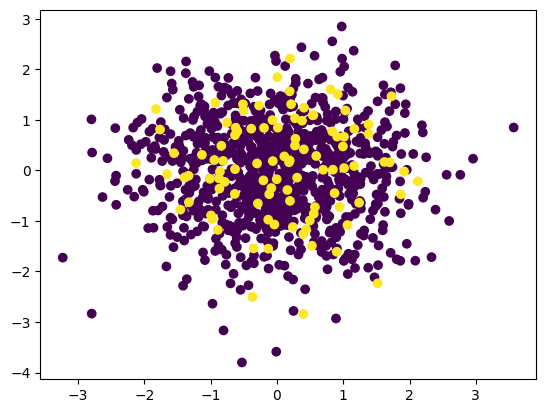

In [48]:
import matplotlib.pyplot as plt
plt.scatter(df['feature_1'], df['feature_2'], c=df['target'])

### UP SAMPLING

In [35]:
df_minority = df[df['target']==1]
df_minority

,feature_1,feature_2,target
900,-0.300232,0.139033,1
901,-0.632261,0.025577,1
902,-0.204317,-0.196443,1
903,0.213696,1.312255,1
904,1.033878,1.187417,1
...,...,...,...
995,-0.623629,0.845701,1
996,0.239810,-1.119923,1
997,-0.868240,-0.359297,1
998,0.902006,-1.609695,1


In [36]:
df_majority = df[df['target']==0]
df_majority

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
895,0.238761,-0.003155,0
896,-1.106386,-0.430660,0
897,0.366732,-0.146416,0
898,1.023906,1.160176,0


### Resample

- resample() is a quick and simple way to duplicate minority class rows.
- It doesn’t generate new values like SMOTE — it just copies existing rows.
- Good for small experiments or categorical-heavy data.

In [37]:
from sklearn.utils import resample

df_minority_upsampled = resample(df_minority, replace = True, 
                                 n_samples=len(df_majority),
                                 random_state = 123)

df_minority_upsampled

,feature_1,feature_2,target
966,-1.328067,-0.629012,1
992,0.196570,-0.602575,1
998,0.902006,-1.609695,1
917,0.197269,2.216788,1
983,0.844335,0.015572,1
...,...,...,...
912,0.834499,0.773754,1
983,0.844335,0.015572,1
917,0.197269,2.216788,1
950,0.399896,-2.840847,1


In [38]:
df_minority_upsampled.shape

(900, 3)

In [39]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
912,0.834499,0.773754,1
983,0.844335,0.015572,1
917,0.197269,2.216788,1
950,0.399896,-2.840847,1


In [41]:
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

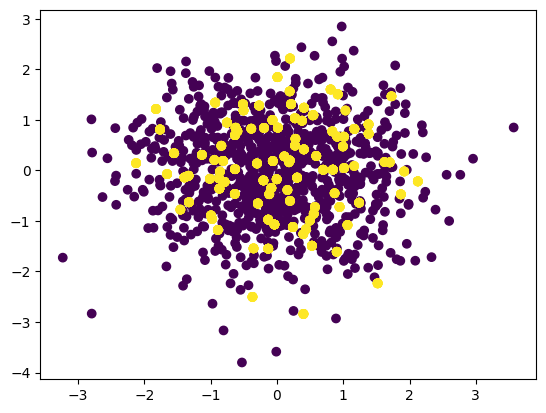

In [49]:
plt.scatter(df_upsampled['feature_1'], df_upsampled['feature_2'], c=df_upsampled['target'])

### DOWN SIZING

In [42]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [43]:
df_majority = df[df['target']==0]
df_minority = df[df['target']==1]

In [ ]:
df_majority_downsizing = resample(df_majority, replace=True,
                                  n_samples = len(df_minority),
                                  random_state = 123)

df_majority_downsizing

,feature_1,feature_2,target
510,0.416124,0.726136,0
365,0.059291,0.494234,0
382,-1.305786,-0.366811,0
322,-0.375750,0.220715,0
98,0.379401,0.470264,0
...,...,...,...
51,-1.038788,-0.778272,0
885,-0.893196,0.651913,0
745,1.308518,-1.287595,0
304,-0.144013,-0.616971,0


In [46]:
df_downsizing = pd.concat([df_minority,df_majority_downsizing]).reset_index(drop=True)

In [47]:
df_downsizing['target'].value_counts()

target
1    100
0    100
Name: count, dtype: int64

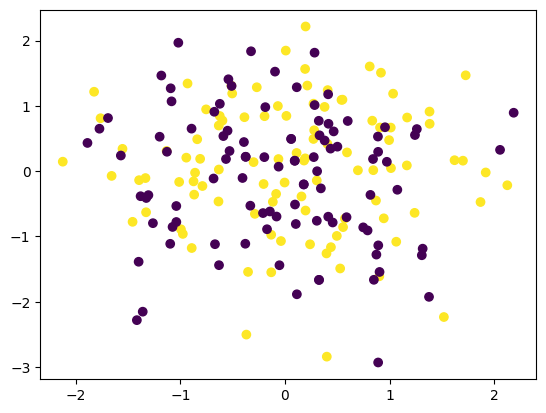

In [50]:
plt.scatter(df_downsizing['feature_1'], df_downsizing['feature_2'], c=df_downsizing['target'])